<a href="https://colab.research.google.com/github/emcgeever-husky/Econ3916/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Manual Data Construction -- given basket items plus phone bill


In [125]:
# Manual Data Construction -- given basket items plus phone bill
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Netflix', 'Price_2016': 9.99, 'Price_2024': 17.99}
    ]

#### Define new machine function


In [126]:
# Define new machine function
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# for loop to run through basket
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Netflix: 80.08% Inflation


### FREDAPI

In [127]:
# bring in FRED API to get inflation data
!pip install fredapi
import pandas as pd
from fredapi import Fred
fred = Fred(api_key = 'API-KEY')

# Fetch CPI plus series that proxy costs
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
netflix = fred.get_series('CUSR0000SERA02')
chipotle = fred.get_series('CUSR0000SEFV')

In [128]:
## Put into Dataframe

df = pd.DataFrame({
    'CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Netflix': netflix,
    'Chipotle': chipotle
})

# Keep start date & use as start of date range
df = df.loc['2016-01-01':]
base_date = '2016-01-01'

df

,CPI,Tuition,Rent,Netflix,Chipotle
2016-01-01,237.652,699.997,291.700,427.538,259.958
2016-02-01,237.336,701.688,292.617,430.633,260.319
2016-03-01,238.080,703.289,293.471,433.738,260.883
2016-04-01,238.992,704.842,294.397,435.570,261.517
2016-05-01,239.557,706.506,295.371,437.005,262.074
...,...,...,...,...,...
2025-08-01,323.364,895.305,437.462,592.604,384.909
2025-09-01,324.368,897.302,438.322,593.928,385.451
2025-10-01,NaN,NaN,NaN,NaN,NaN
2025-11-01,325.031,902.001,438.875,599.226,387.202


### Index Dataframe by 2016 numbers

In [129]:
# Index Dataframe
df_inf_idx = df.copy()

# Normalize data in
for col in df.columns:
    base_value = df.loc[base_date, col]
    df_inf_idx[col] = (df[col] / base_value) * 100

df_inf_idx

,CPI,Tuition,Rent,Netflix,Chipotle
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.723912,100.138869
2016-03-01,100.180095,100.470288,100.607131,101.450163,100.355827
2016-04-01,100.563850,100.692146,100.924580,101.878663,100.599712
2016-05-01,100.801592,100.929861,101.258485,102.214306,100.813978
...,...,...,...,...,...
2025-08-01,136.066181,127.901262,149.969832,138.608498,148.065841
2025-09-01,136.488647,128.186549,150.264655,138.918178,148.274337
2025-10-01,NaN,NaN,NaN,NaN,NaN
2025-11-01,136.767627,128.857838,150.454234,140.157366,148.947907


### Visualizations

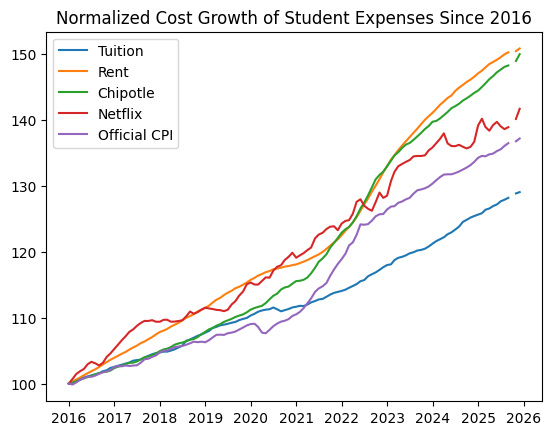

In [130]:
## Visualize

import matplotlib.pyplot as plt

plt.plot(df_inf_idx.index, df_inf_idx['Tuition'], label='Tuition')
plt.plot(df_inf_idx.index, df_inf_idx['Rent'], label='Rent')
plt.plot(df_inf_idx.index, df_inf_idx['Chipotle'], label='Chipotle')
plt.plot(df_inf_idx.index, df_inf_idx['Netflix'], label='Netflix')
plt.plot(df_inf_idx.index, df_inf_idx['CPI'], label='Official CPI')

plt.title('Normalized Cost Growth of Student Expenses Since 2016')
plt.legend()

plt.show()


### Weight Expsenses

In [131]:
## Weights of Expenses

weights = {
    'Tuition': 0.30,
    'Rent': 0.55,
    'Chipotle': 0.10,
    'Netflix': 0.05
}

In [132]:
# Create weighted index

df_inf_idx['Student_SPI'] = (
    weights['Tuition'] * df_inf_idx['Tuition'] +
    weights['Rent'] * df_inf_idx['Rent'] +
    weights['Chipotle'] * df_inf_idx['Chipotle'] +
    weights['Netflix'] * df_inf_idx['Netflix']
)



## Weighted v. Unweighted

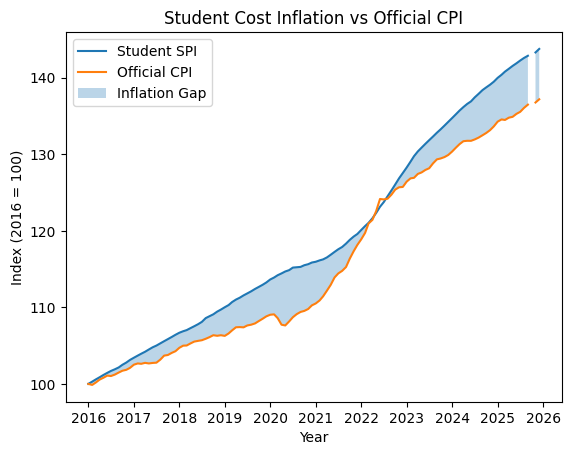

In [133]:
## Plot the difference (Weighted v. Unweighted)

plt.plot(df_inf_idx.index, df_inf_idx['Student_SPI'], label='Student SPI')
plt.plot(df_inf_idx.index, df_inf_idx['CPI'], label='Official CPI')

# Inflation gap shading
plt.fill_between(
    df_inf_idx.index,
    df_inf_idx['Student_SPI'],
    df_inf_idx['CPI'],
    where=(df_inf_idx['Student_SPI'] > df_inf_idx['CPI']),
    alpha=0.3,
    interpolate=True,
    label='Inflation Gap'
)

plt.xlabel('Year')
plt.ylabel('Index (2016 = 100)')
plt.title('Student Cost Inflation vs Official CPI')
plt.legend()

plt.show()


## Non-Normalized

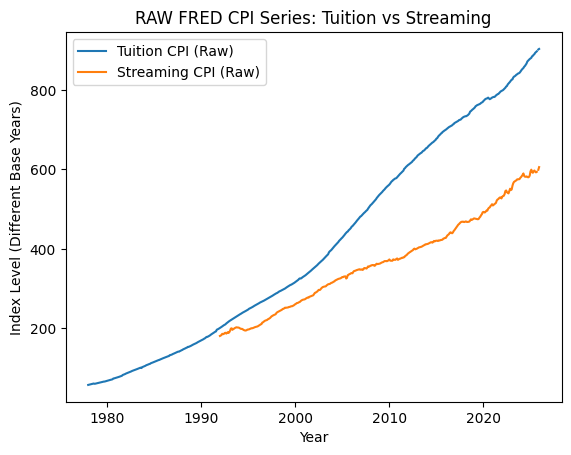

In [134]:
## Example of Non-Normalized Data

df_raw = pd.DataFrame({
    'CPI_Tuition': tuition,
    'CPI_Streaming': netflix
})

plt.plot(df_raw.index, df_raw['CPI_Tuition'], label='Tuition CPI (Raw)')
plt.plot(df_raw.index, df_raw['CPI_Streaming'], label='Streaming CPI (Raw)')

plt.xlabel('Year')
plt.ylabel('Index Level (Different Base Years)')
plt.title('RAW FRED CPI Series: Tuition vs Streaming')
plt.legend()

plt.show()

### Boston vs. USA vs. You

/tmp/ipython-input-723890969.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_plot = df_plot.fillna(method='ffill').fillna(method='bfill')


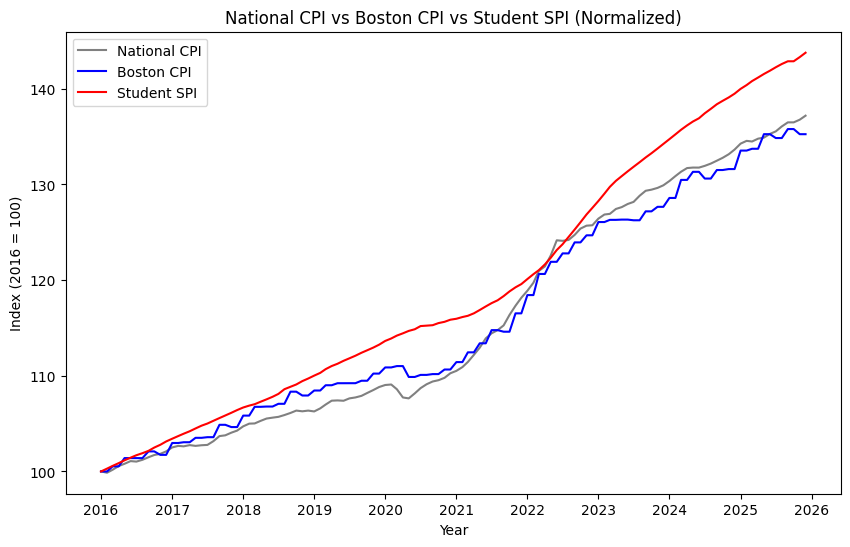

In [135]:
# FRED series id for Boston CPI
boston_cpi = fred.get_series('CUURA103SA0')  # Boston CPI, all items :contentReference[oaicite:1]{index=1}

# --- Step 2: Re-index Boston CPI to Jan 2016 = 100 ---

# Restrict to 2016 onward and ensure no missing values break indexing
boston_cpi = boston_cpi.loc['2016-01-01':].dropna()

# Determine the base value at Jan 2016
base_val = boston_cpi.loc['2016-01-01']

# Normalize Boston CPI so Jan 2016 = 100
boston_indexed = (boston_cpi / base_val) * 100

# Put it into a DataFrame
df_boston = pd.DataFrame({'Boston_CPI': boston_indexed})

# --- Step 3: Combine with existing normalized data ---

# Assume df_inf_idx already exists with:
# 'Official_CPI' and 'Student_SPI' normalized to 100 at 2016
df_plot = pd.concat([df_inf_idx[['CPI', 'Student_SPI']], df_boston], axis=1)

# Forward/backfill missing values if needed (since Boston CPI may be bi-monthly)
df_plot = df_plot.fillna(method='ffill').fillna(method='bfill')

# --- Step 4: Plot all three lines ---

plt.figure(figsize=(10, 6))

plt.plot(df_plot.index, df_plot['CPI'], color='grey', label='National CPI')
plt.plot(df_plot.index, df_plot['Boston_CPI'], color='blue', label='Boston CPI')
plt.plot(df_plot.index, df_plot['Student_SPI'], color='red', label='Student SPI')

plt.xlabel('Year')
plt.ylabel('Index (2016 = 100)')
plt.title('National CPI vs Boston CPI vs Student SPI (Normalized)')
plt.legend()

plt.show()
